# Assessment assignment for Detection 8_8_2020 using OpenCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
'''
Goal: 
1. detect a russina license plate
2. Blurr them out with images

pre-requisite: 
OpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files 

Just go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur 
the image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.
 
 or
 
Use this notebook! Here we offer a guide of what main steps you should take to complete the project.


'''

'\nGoal: \n1. detect a russina license plate\n2. Blurr them out with images\n\npre-requisite: \nOpenCV comes with a Russian license plate detector .xml file that we can use like we used the face detection files \n\nJust go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur \nthe image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.\n \n or\n \nUse this notebook! Here we offer a guide of what main steps you should take to complete the project.\n\n\n'

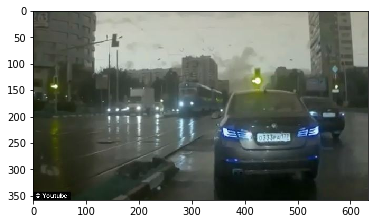

In [20]:
image = cv2.imread('./original/Computer-Vision-with-Python/DATA/car_plate.jpg')
plt.imshow(image)

In [39]:
# make the image bigger
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
    return new_img

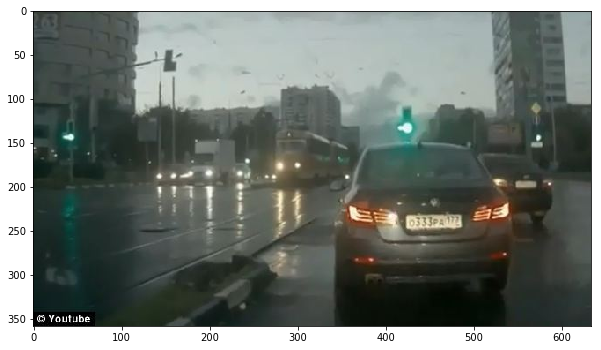

In [40]:
new_img = display(image)

In [41]:
# getting the plate classifier model/kernel loaded into an object called plate_classifier

plate_classifier = cv2.CascadeClassifier('./original/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [42]:
# Detect the image
def detect_plate(image):
    plate1 = image.copy()
    
    plate_rect = plate_classifier.detectMultiScale(plate1, 1.3,3)   #detectMultiScale returns the values to draw a rectangle
    #draw a rectangle
    
    for (x,y,w,h) in plate_rect:
        cv2.rectangle(plate1, (x,y), (x+w, y+h),(255,255,255),10)
        
    return plate1
    
    


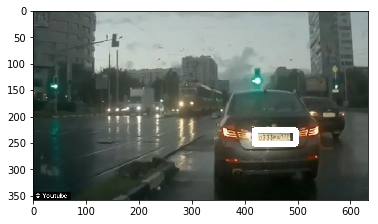

In [43]:
# testing that detect image works!
classified_plate = detect_plate(new_img)
plt.imshow(classified_plate)

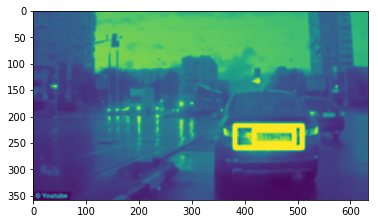

In [14]:
# you have to cut the rectengular area as Region of Intererst and cut it out ...then blurr, then put it back in
# now blur the image
blurred = cv2.blur(classified_plate,ksize = (5,5)) 
plt.imshow(blurred)

In [58]:
def detect_and_blur_plate(img):
    image_plate = img.copy()
    roi = img.copy()
    
    plate_rect = plate_classifier.detectMultiScale(image_plate, 1.3,3) 
    
    for (x,y,w,h) in plate_rect:
        roi = roi[y:y+h, x:x+w]    # this selects the region of interest using...you do the y first....strange!
        roi_blurred = cv2.medianBlur(roi, 7)
        
        image_plate[y:y+h, x:x+w] = roi_blurred    # past it back in 
        plt.imshow(image_plate)
        
    return image_plate
    

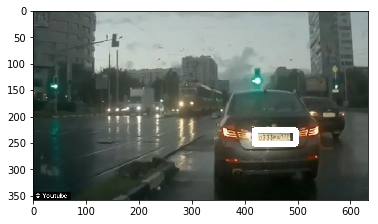

In [59]:
results = detect_and_blur_plate(classified_plate)
plt.imshow(results)